In [1]:
#########################################################################
# Convolutional Neural Network - Fruit Classification
#########################################################################
import os

# Set the working directory
os.chdir(r'C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Deep Learning\CNN')


#########################################################################
# Import required packages
#########################################################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Dropout, Activation
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))



In [2]:
#########################################################################
# Set Up flow For Training & Validation data
#########################################################################

# data flow parameters

training_data_dir = 'data/training'
validation_data_dir = 'data/validation'
batch_size = 32
img_width = 128
img_height = 128
num_channels = 3
num_classes = 6

# image generators

training_generator = ImageDataGenerator(rescale = 1./255) #We will force pixel values for each RGB values to exist between 0-1
validation_generator = ImageDataGenerator(rescale=1./255)


# image flows
training_set = training_generator.flow_from_directory(directory = training_data_dir, #training data
                                                        target_size = (img_width, img_height),#Size of images
                                                        batch_size = batch_size,#Amount of images passed for each mini-batch
                                                        class_mode = "categorical")#What type of problem is being solved - multi-class classification problem here

validation_set = validation_generator.flow_from_directory(directory = validation_data_dir, #training data
                                                        target_size = (img_width, img_height),#Size of images
                                                        batch_size = batch_size,#Amount of images passed for each mini-batch
                                                        class_mode = "categorical")#What type of problem is being solved - multi-class classification problem here


Found 360 images belonging to 6 classes.
Found 180 images belonging to 6 classes.


In [3]:
#########################################################################
# Network Architecture
#########################################################################

# network architecture

model = Sequential()

#Padding =same - added in a way that we can use all pixels
#filters = 32 is a guess/32 feature maps
#Conv2D - Convolving over two dimensions...each RGB layers in input image is done in grid - we move across and down/up - 2 dimensions 
#Conv1d - text
#Conv3d - video
model.add(Conv2D(filters = 32, kernel_size=(3,3), padding = "same", input_shape = (img_width, img_height, num_channels))) 
model.add(Activation("relu"))
model.add(MaxPooling2D()) 

model.add(Conv2D(filters = 32, kernel_size=(3,3), padding = "same")) 
model.add(Activation("relu"))
model.add(MaxPooling2D()) 

#Flattening
model.add(Flatten())

model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(num_classes)) #Forced to have specific number of neurons...this is output...neuron for each of the classes we want to predict...we have 6 classes (see above) use num_classes
model.add(Activation("softmax")) #Need 6 probabilities for each image - this will take all output vales and ensure they add up to 1 or 100%

# compile network

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])      

# view network architecture
model.summary()

C:\Users\19144\anaconda4\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,048,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,058,950 (4.04 MB)

 Trainable params: 1,058,950 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
#32x32x32x32 + 32 bias values = 1,048,608

In [5]:
#########################################################################
# Train Our Network!
#########################################################################

# training parameters

num_epochs = 50
model_filename = "models/fruits_cnn_v01.keras" #h5 is file format keras will use to save architecture and values of network parameters


# callbacks
save_best_model = ModelCheckpoint(filepath = model_filename,
                                 monitor = 'val_accuracy',
                                 mode = 'max',
                                 verbose = 1,
                                 save_best_only = True)


# train the network

history = model.fit(x=training_set, #We will pass batches of training data in
                    validation_data = validation_set,
                    batch_size = batch_size,
                    epochs = num_epochs,
                    callbacks = [save_best_model])


Epoch 1/50


C:\Users\19144\anaconda4\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1592 - loss: 2.0187
Epoch 1: val_accuracy improved from -inf to 0.14444, saving model to models/fruits_cnn_v01.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.1591 - loss: 2.0105 - val_accuracy: 0.1444 - val_loss: 1.7794
Epoch 2/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2080 - loss: 1.7575
Epoch 2: val_accuracy improved from 0.14444 to 0.24444, saving model to models/fruits_cnn_v01.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.2136 - loss: 1.7542 - val_accuracy: 0.2444 - val_loss: 1.6663
Epoch 3/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2748 - loss: 1.6971
Epoch 3: val_accuracy improved from 0.24444 to 0.36111, saving model to models/fruits_cnn_v01.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.2744 - loss: 1.6932 - val_accuracy: 0.3611 - val_loss: 1.5901
Epoch 4/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3713 - loss: 1.5922
Epoch 4: val_accuracy i

In [6]:
#Best accuracy was 90%

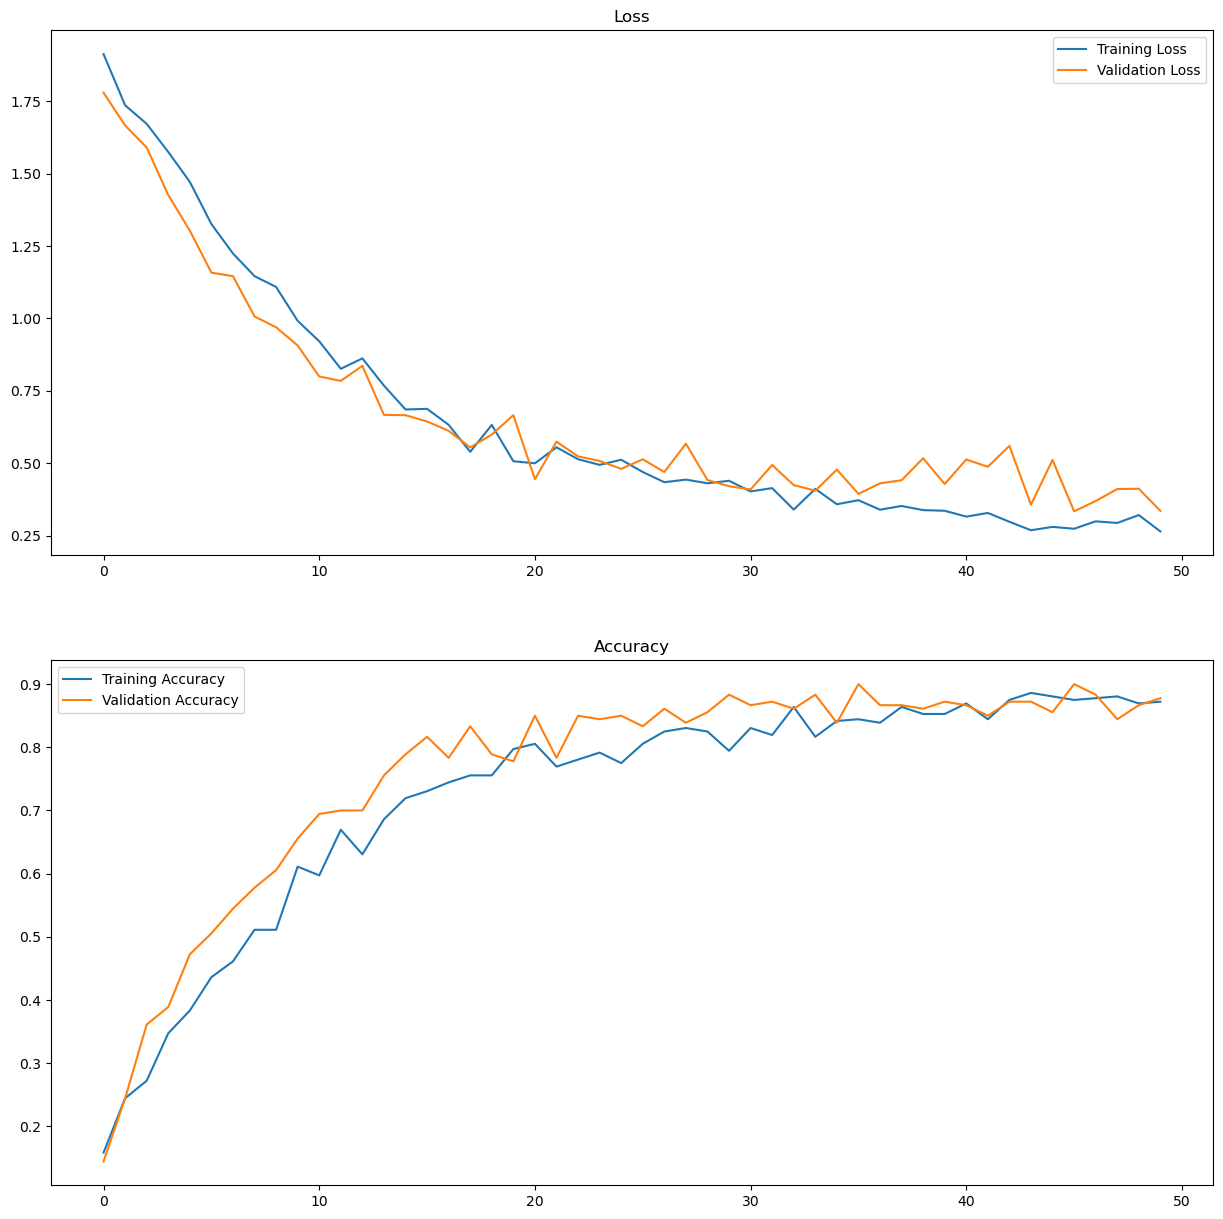

0.8999999761581421

In [7]:
#########################################################################
# Visualise Training & Validation Performance
#########################################################################

# plot validation results
fig, ax = plt.subplots(2, 1, figsize=(15,15))
ax[0].set_title('Loss')
ax[0].plot(history.epoch, history.history["loss"], label="Training Loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(history.epoch, history.history["accuracy"], label="Training Accuracy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy")
ax[0].legend()
ax[1].legend()
plt.show()

# get best epoch performance for validation accuracy
max(history.history['val_accuracy'])



In [8]:
#Epoch on x axis, y axis is score
#20-30 epochs seems to be where most improvement lies


In [10]:
#########################################################################
# Make Predictions On New Data (Test Set)
#########################################################################

# parameters for prediction

model_filename = 'models/fruits_cnn_v01.keras' #h5 is file format keras will use to save architecture and values of network parameters

#Need these so that network was scanned through images in this size...we need to make sure we pass in images in the same size as we did before
img_height = 128
img_width = 128
labels_list = ['apple', 'avocado', 'banana', 'kiwi', 'lemon', 'orange'] #Written in alphabetical order in the same way they are in the directory

# load model

model = load_model(model_filename)

# import image & apply pre-processing

filepath = 'data/test/banana/banana_0074.jpg'

image = load_img(filepath, target_size = (img_width, img_height))
image = img_to_array(image)
image = np.expand_dims(image, axis = 0) #axis=0 to tell numpy where to add...it will add at start of array
#image.shape #Now there is one dimension added here, keras needs to know how many arrays, we have 1 array added now at the beginning...a batch of 1
image = image * (1./255) #Normalize pixel values 

# predict class probabilities
class_probs = model.predict(image)

# print class probabilities
print("Shape of class_probs:", class_probs.shape)
print("Class probabilities:", class_probs)

# find the predicted class index
predicted_class = np.argmax(class_probs)
print("Predicted class index:", predicted_class)

# find the predicted label
predicted_label = labels_list[predicted_class]
print("Predicted label:", predicted_label)


    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Shape of class_probs: (1, 6)
Class probabilities: [[1.8380541e-02 1.5611537e-03 9.6845502e-01 2.8368460e-03 8.4943566e-03
  2.7209910e-04]]
Predicted class index: 2
Predicted label: banana


In [11]:
#Shape of class probabilities
#print("Shape of class_probs:", class_probs.shape)
#Class probabilities
#print("Class probabilities:", class_probs)
#predicted_class = np.argmax(class_probs)
#Predicted class index
#print("Predicted class index:", predicted_class)
#print("Labels list:", labels_list)
#Predicted class
#predicted_label = labels_list[predicted_class]
#print("Predicted label:", predicted_label)
#Confidence that it thought it was a banana
#predicted_prob = class_probs[0][predicted_class]
#print("Predicted probability:", predicted_prob)

In [12]:
# image pre-processing function

def preprocess_image(filepath):
    image = load_img(filepath, target_size = (img_width, img_height))
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    image = image * (1./255) 
    return image

# image prediction function

def make_prediction(image):
    
    class_probs = model.predict(image)
    predicted_class = np.argmax(class_probs)
    predicted_label = labels_list[predicted_class]
    predicted_prob = class_probs[0][predicted_class]
    
    return predicted_label,predicted_prob

#test code
#image = preprocess_image(filepath)
#make_prediction(image)

In [20]:
#loop through test data
source_dir = "data/test/"
folder_names = ['apple', 'avocado', 'banana', 'kiwi', 'lemon', 'orange']
actual_labels = []
predicted_labels = []
predicted_probabilities = []
filenames = []

for folder in folder_names:
    images = listdir(source_dir + '/' + folder)
    
    for image in images:
        
        processed_image = preprocess_image(source_dir + '/' + folder + '/' + image)
        predicted_label, predicted_probability = make_prediction(processed_image)
        
        actual_labels.append(folder)
        predicted_labels.append(predicted_label)
        predicted_probabilities.append(predicted_probability)
        filenames.append(image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [14]:
# create dataframe to analyse
predictions_df = pd.DataFrame({"actual_label":actual_labels,
                              "predicted_label":predicted_labels,
                              "predicted_probability":predicted_probabilities,
                              "filename":filenames})

predictions_df["correct"] = np.where(predictions_df["actual_label"] == predictions_df["predicted_label"], 1, 0) #1 for correct, 0 for not correct

predictions_df

,actual_label,predicted_label,predicted_probability,filename,correct
0,apple,apple,0.993089,apple_0004.jpg,1
1,apple,apple,0.706888,apple_0014.jpg,1
2,apple,apple,0.987176,apple_0024.jpg,1
3,apple,apple,0.515435,apple_0034.jpg,1
4,apple,apple,0.999999,apple_0044.jpg,1
5,apple,apple,0.999674,apple_0054.jpg,1
6,apple,apple,0.999993,apple_0064.jpg,1
7,apple,apple,1.000000,apple_0074.jpg,1
8,apple,apple,0.999999,apple_0084.jpg,1
9,apple,kiwi,0.480572,apple_0094.jpg,0


In [15]:
# overall test set accuracy
test_set_accuracy = predictions_df["correct"].sum() / len(predictions_df)
print(test_set_accuracy)
#91.6% accurate - This is pretty good

0.9166666666666666


In [16]:
# confusion matrix raw numbers
confusion_matrix = pd.crosstab(predictions_df["predicted_label"], predictions_df["actual_label"])
confusion_matrix

actual_label,apple,avocado,banana,kiwi,lemon,orange
predicted_label,,,,,,
apple,9,0,0,0,0,0
avocado,0,10,0,1,0,0
banana,0,0,10,0,0,0
kiwi,1,0,0,8,0,2
lemon,0,0,0,0,10,0
orange,0,0,0,1,0,8


In [17]:
#Actual scores are along the top
#Predicted scores are along the left hand side
#For apples, 9/10 were right, for avacados 10/10, for bananas 10/10, for lemons 10/10


In [18]:
#Confusion matrix percentages
confusion_matrix = pd.crosstab(predictions_df["predicted_label"], predictions_df["actual_label"], normalize = 'columns')
confusion_matrix


actual_label,apple,avocado,banana,kiwi,lemon,orange
predicted_label,,,,,,
apple,0.9,0.0,0.0,0.0,0.0,0.0
avocado,0.0,1.0,0.0,0.1,0.0,0.0
banana,0.0,0.0,1.0,0.0,0.0,0.0
kiwi,0.1,0.0,0.0,0.8,0.0,0.2
lemon,0.0,0.0,0.0,0.0,1.0,0.0
orange,0.0,0.0,0.0,0.1,0.0,0.8


In [19]:
#How can we make the network better? How can we make it more reliable?